In [21]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from pathlib import Path
from IPython.display import Image 
from scipy.signal import medfilt
from tqdm import tqdm
from scipy.ndimage import gaussian_filter1d

In [22]:
proj_dir="/master/nplatt/sch_hae_scan"
results_dir="{}/results".format(proj_dir)
os.chdir(results_dir)

In [23]:
Path("{}/ancestry_twisst_fig".format(results_dir)).mkdir(parents=True, exist_ok=True)
os.chdir("{}/ancestry_twisst_fig".format(results_dir))

In [35]:
# p_df = pd.read_csv(f"{proj_dir}/results/fig_plotting_info/plotting_info.csv", sep=",") #generated in prep_figs_info.ipynb
# r_df = pd.read_csv(f"{proj_dir}/results/rfmix/rfmix_perc_bovis_genome.csv", sep=",")
# t_df = pd.read_csv(f"{proj_dir}/results/twisst/twisst_results.csv", sep=",")
x_df = pd.read_csv(f"{proj_dir}/results/selscan/sel_df_norm.csv", sep=",")
# d_df = pd.read_csv(f"{proj_dir}/results/abba_baba/patterson_d.csv", sep=",")
# f_df = pd.read_csv(f"{proj_dir}/results/fst/genome_wide_fsts.csv", sep=",")

In [36]:
pos_df = pd.read_csv(f"{proj_dir}/results/fig_plotting_info/plotting_info.csv", sep=",") #generated in prep_figs_info.ipynb

# Create offsets and colors mappings
offsets = pos_df.set_index("contig")["x_start"].astype(int).to_dict()
colors = pos_df.set_index("contig")["color"].astype(str).to_dict()

In [37]:
target_loci = [ ["NC_067200.1","9773000","10447000"],
                ["NC_067199.1","28476500","28813500"]]

targets=[]

for locus in target_loci:
    targets.append(int(locus[1]) + offsets[locus[0]])
    targets.append(int(locus[2]) + offsets[locus[0]])


# RFMIX

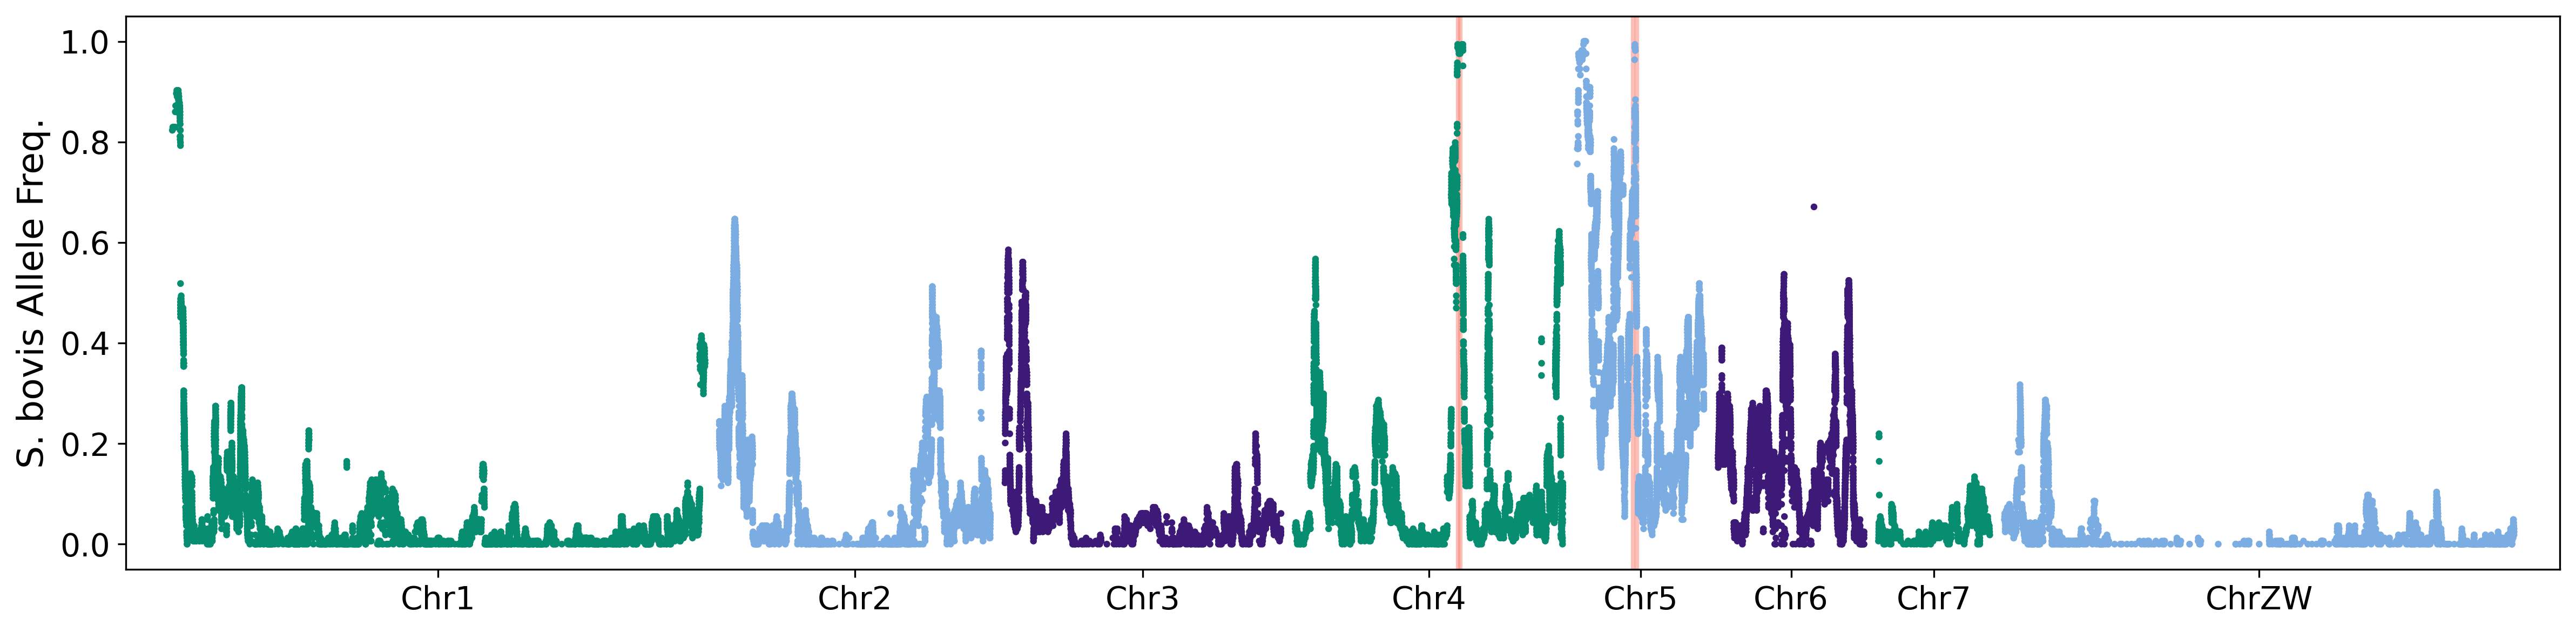

In [50]:
fig, ax = plt.subplots(figsize=(16, 4), facecolor="white", dpi=300)

               
plt.scatter((r_df["x_start"] + r_df["x_end"])/2, r_df["perc_sh_nw"], s=4, color=r_df["color"], zorder=2)


# Set the x-axis and y-axis labels
ax.set_ylabel("S. bovis Allele Freq.", fontsize=16)
ax.tick_params(axis='y', labelsize=14)

ax.tick_params(axis='x', labelsize=14)
x_ticks  = list(pos_df["mid_tick"].astype(int)[0:8])
x_labels = list(pos_df["contig"].astype(str)[0:8])
ax.set_xticks(x_ticks)
ax.set_xticklabels(["Chr1", "Chr2", "Chr3", "Chr4", "Chr5", "Chr6", "Chr7", "ChrZW"])

for target in targets:
    plt.axvline(x=target, color='salmon', linestyle='-', linewidth=2, zorder=1, alpha=0.5)

plt.xlim(-8_000_000, 417_563_131)

plt.tight_layout()


# plt.savefig("rfmix.svg")
plt.savefig("rfmix.png", dpi=600)

plt.show()

# TWISST

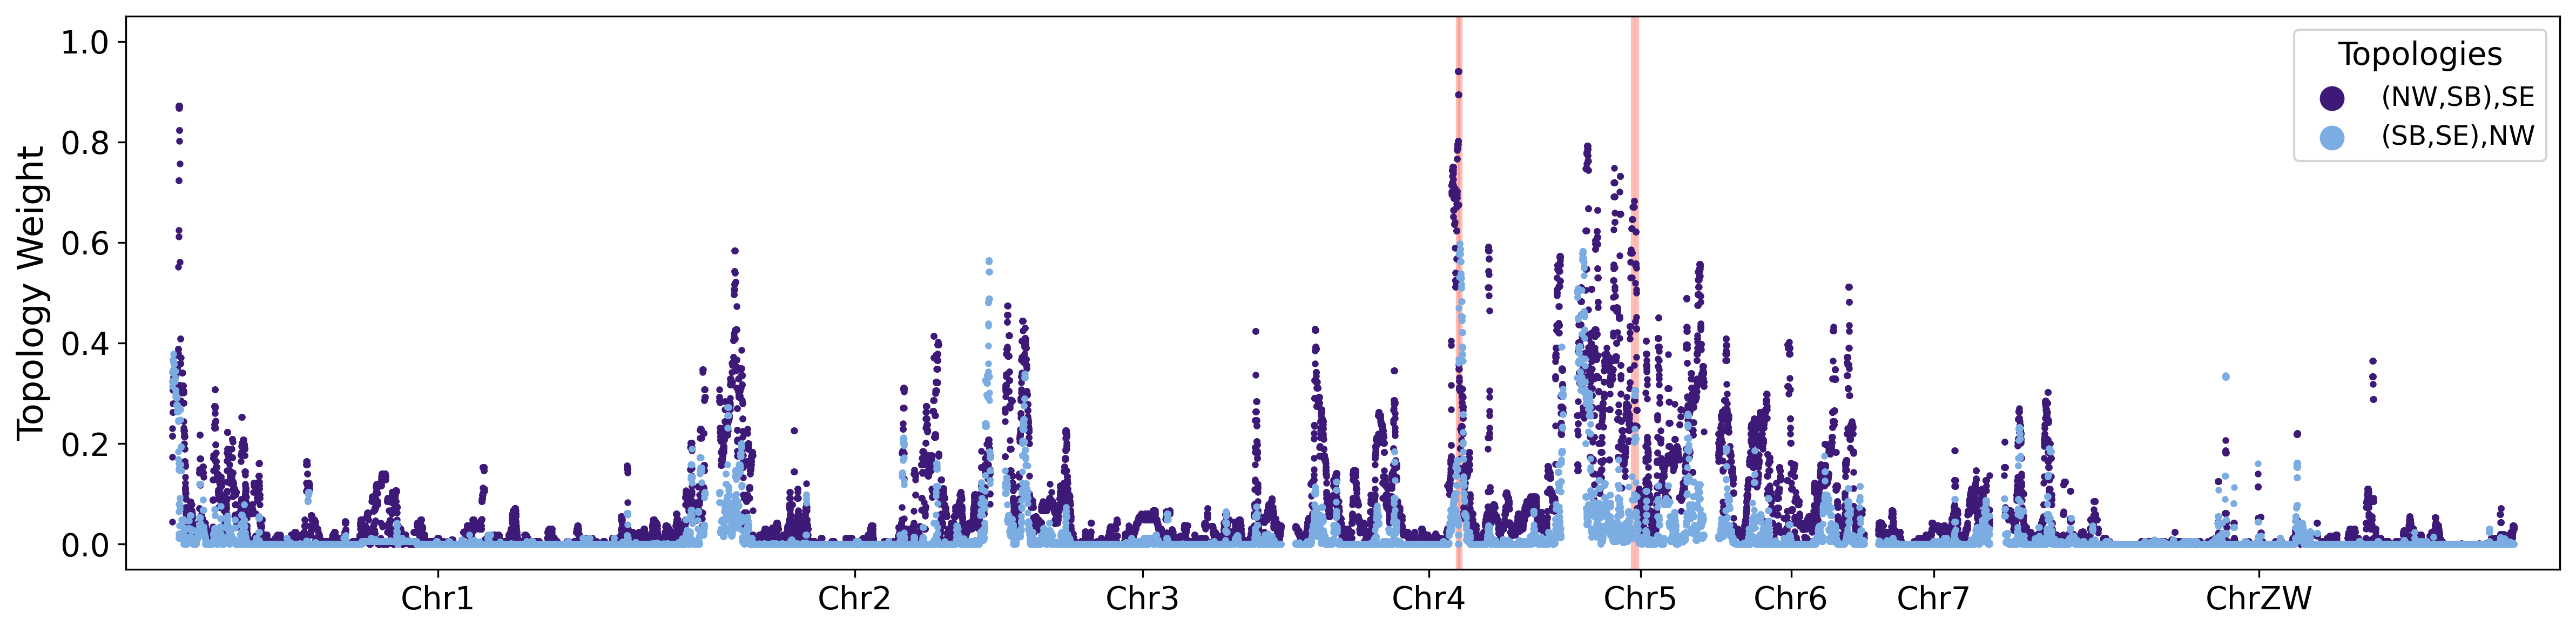

In [54]:
fig, ax = plt.subplots(figsize=(16, 4), facecolor="white", dpi=300)

k=21

w=t_df["x_end"] - t_df["x_start"]
x=t_df["x_start"]

m1=medfilt(t_df['topo1'], kernel_size=k)
m2=medfilt(t_df['topo2'], kernel_size=k)
m3=medfilt(t_df['topo3'], kernel_size=k)

plt.scatter(x, m1, label="(NW,SB),SE", color="#3e1a78", s=4, zorder=2)
plt.scatter(x, m3, label="(SB,SE),NW", color="#7bade3", s=4, zorder=2)
#plt.scatter(x, m2, label="(NW,SE),SB", color="#078d70", s=3)

# Set the x-axis and y-axis labels
ax.set_ylabel("Topology Weight", fontsize=16)
ax.tick_params(axis='y', labelsize=14)
ax.tick_params(axis='x', labelsize=14)
x_ticks  = list(pos_df["mid_tick"].astype(int)[0:8])
x_labels = list(pos_df["contig"].astype(str)[0:8])
ax.set_xticks(x_ticks)
ax.set_xticklabels(["Chr1", "Chr2", "Chr3", "Chr4", "Chr5", "Chr6", "Chr7", "ChrZW"])

plt.ylim([-0.05,1.05])

legend = plt.legend(title="Topologies", loc='upper right', fontsize=12)
legend.set_title('Topologies', prop={'size': 14})  # Adjust the title size here

# Adjust the marker sizes in the legend
desired_size = 100  # Size of markers in legend
for handle in legend.legendHandles: 
    handle._sizes = [desired_size]

for target in targets:
    plt.axvline(x=target, color='salmon', linestyle='-', linewidth=2, zorder=1, alpha=0.5)

plt.xlim(-8_000_000, 417_563_131)

plt.tight_layout()

plt.savefig("twist.png", dpi=600)
# plt.savefig("twist.svg")
plt.show()

# XPEHH

In [38]:
x_df.head()

chr    pos                 id     gpos        p1     ihh1  \
0  NC_067195.1  16981  NC_067195.1:16981  16981.0  0.000000  526.758   
1  NC_067195.1  16982  NC_067195.1:16982  16982.0  0.012195  514.763   
2  NC_067195.1  16993  NC_067195.1:16993  16993.0  0.036585  484.027   
3  NC_067195.1  16994  NC_067195.1:16994  16994.0  0.128049  471.285   
4  NC_067195.1  16995  NC_067195.1:16995  16995.0  0.006098  474.874   

         p2     ihh2     xpehh  normxpehh  crit  norm_p_value  \
0  0.042373  1417.04 -0.429771   -1.81653     0      0.069289   
1  0.000000  1420.99 -0.440983   -1.87203     0      0.061202   
2  0.000000  1420.99 -0.467720   -2.00436     1      0.045032   
3  0.000000  1420.99 -0.479306   -2.06171     1      0.039235   
4  0.000000  1420.99 -0.476012   -2.04540     1      0.040815   

   p_value_bonferroni       fdr  genomic_position    color  
0                 1.0  0.999998         320430638  #7bade3  
1                 1.0  0.973371         320430639  #7bade3  
2                 1.0  0.888875         320430650  #7bade3  
3                 1.0  0.849029         320430651  #7bade3  
4                 1.0  0.859831         320430652  #7bade3

In [41]:
# Map offsets and colors to x_df
x_df["offset"] = x_df["chr"].map(offsets)
x_df["color"] = x_df["chr"].map(colors)

# Calculate x_pos using vectorized operations
x_df["x_pos"] = x_df["pos"] + x_df["offset"]

# Drop the temporary 'offset' column if not needed
x_df = x_df.drop(columns=["offset"])

x_df.to_csv(f"xpehh_to_plot.csv", header=True, sep=",", index=False)
x_df.head()

chr    pos                 id     gpos        p1     ihh1  \
0  NC_067195.1  16981  NC_067195.1:16981  16981.0  0.000000  526.758   
1  NC_067195.1  16982  NC_067195.1:16982  16982.0  0.012195  514.763   
2  NC_067195.1  16993  NC_067195.1:16993  16993.0  0.036585  484.027   
3  NC_067195.1  16994  NC_067195.1:16994  16994.0  0.128049  471.285   
4  NC_067195.1  16995  NC_067195.1:16995  16995.0  0.006098  474.874   

         p2     ihh2     xpehh  normxpehh  crit  norm_p_value  \
0  0.042373  1417.04 -0.429771   -1.81653     0      0.069289   
1  0.000000  1420.99 -0.440983   -1.87203     0      0.061202   
2  0.000000  1420.99 -0.467720   -2.00436     1      0.045032   
3  0.000000  1420.99 -0.479306   -2.06171     1      0.039235   
4  0.000000  1420.99 -0.476012   -2.04540     1      0.040815   

   p_value_bonferroni       fdr  genomic_position    color      x_pos  
0                 1.0  0.999998         320430638  #7bade3  320430638  
1                 1.0  0.973371         320430639  #7bade3  320430639  
2                 1.0  0.888875         320430650  #7bade3  320430650  
3                 1.0  0.849029         320430651  #7bade3  320430651  
4                 1.0  0.859831         320430652  #7bade3  320430652

In [42]:
alpha = 0.05
x_df.loc[x_df["p_value_bonferroni"] < alpha, "color"] = "red"

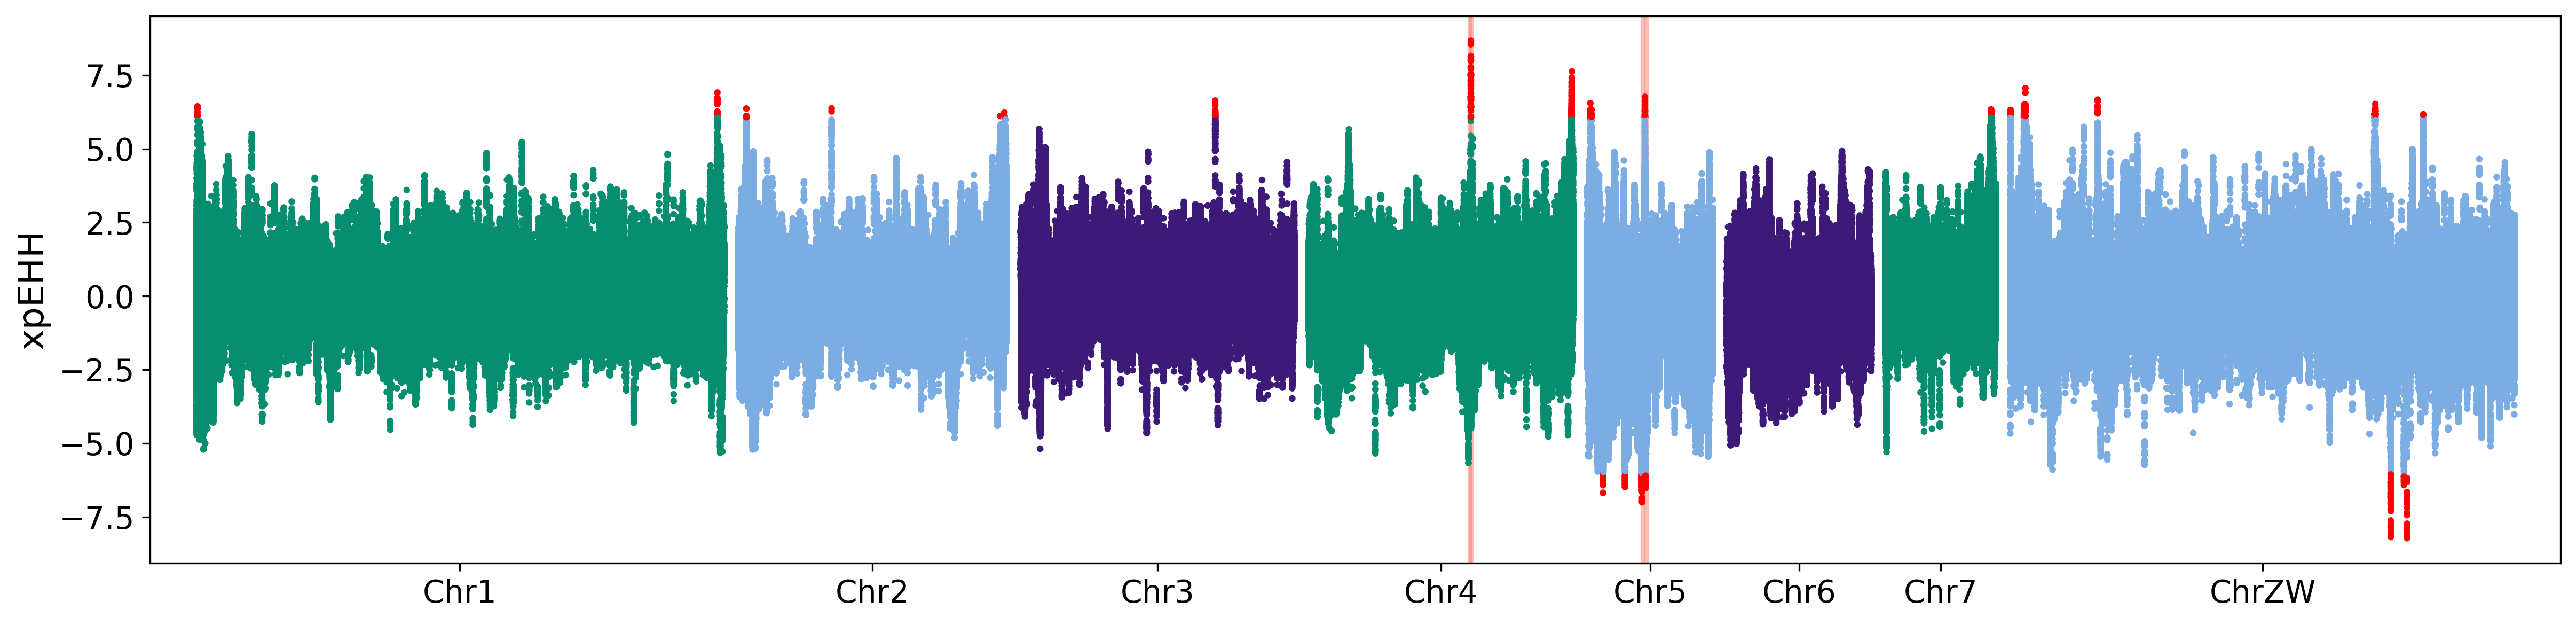

In [43]:
fig, ax = plt.subplots(figsize=(16, 4), facecolor="white", dpi=300)

plt.scatter(x_df["x_pos"], x_df["normxpehh"], color=x_df["color"], s=4, zorder=2)

# Set the x-axis and y-axis labels
ax.set_ylabel("xpEHH", fontsize=16)
ax.tick_params(axis='y', labelsize=14)

ax.tick_params(axis='x', labelsize=14)
x_ticks  = list(pos_df["mid_tick"].astype(int)[0:8])
x_labels = list(pos_df["contig"].astype(str)[0:8])
ax.set_xticks(x_ticks)
ax.set_xticklabels(["Chr1", "Chr2", "Chr3", "Chr4", "Chr5", "Chr6", "Chr7", "ChrZW"])

for target in targets:
    plt.axvline(x=target, color='salmon', linestyle='-', linewidth=2, zorder=1, alpha=0.5)

plt.xlim(-8_000_000, 417_563_131)

plt.tight_layout()

plt.show()

# Save the plot as a 300 dpi PNG file
fig.savefig('nw_vs_se_xpehh_norm_w_zw.png', format='png', dpi=300, bbox_inches='tight')



# D ABBA BABA

In [10]:
d_df.head()

chrom   start    stop         d  n_snps   z_score
0  NC_067195.1   14416   74027  0.137777     500  0.320464
1  NC_067195.1   74029  141908  0.175852     500  0.409026
2  NC_067195.1  141910  146989  0.213571     500  0.496759
3  NC_067195.1  146990  157234  0.317944     500  0.739525
4  NC_067195.1  157235  161794  0.514793     500  1.197390

In [10]:
# Map offsets and colors to x_df
d_df["offset"] = d_df["chrom"].map(offsets)
d_df["color"]  = d_df["chrom"].map(colors)

# Calculate x_pos using vectorized operations
d_df["x_pos"] = (d_df["start"] + d_df["stop"])/2 + d_df["offset"]

# Drop the temporary 'offset' column if not needed
d_df = d_df.drop(columns=["offset"])

d_df.to_csv(f"d_to_plot.csv", header=True, sep=",", index=False)
d_df.head()

chrom   start    stop         d  n_snps   z_score    color  \
0  NC_067195.1   14416   74027  0.137777     500  0.320464  #7bade3   
1  NC_067195.1   74029  141908  0.175852     500  0.409026  #7bade3   
2  NC_067195.1  141910  146989  0.213571     500  0.496759  #7bade3   
3  NC_067195.1  146990  157234  0.317944     500  0.739525  #7bade3   
4  NC_067195.1  157235  161794  0.514793     500  1.197390  #7bade3   

         x_pos  
0  320457878.5  
1  320521625.5  
2  320558106.5  
3  320565769.0  
4  320573171.5

In [23]:
d_df["z_score"].max()

2.325962928313713

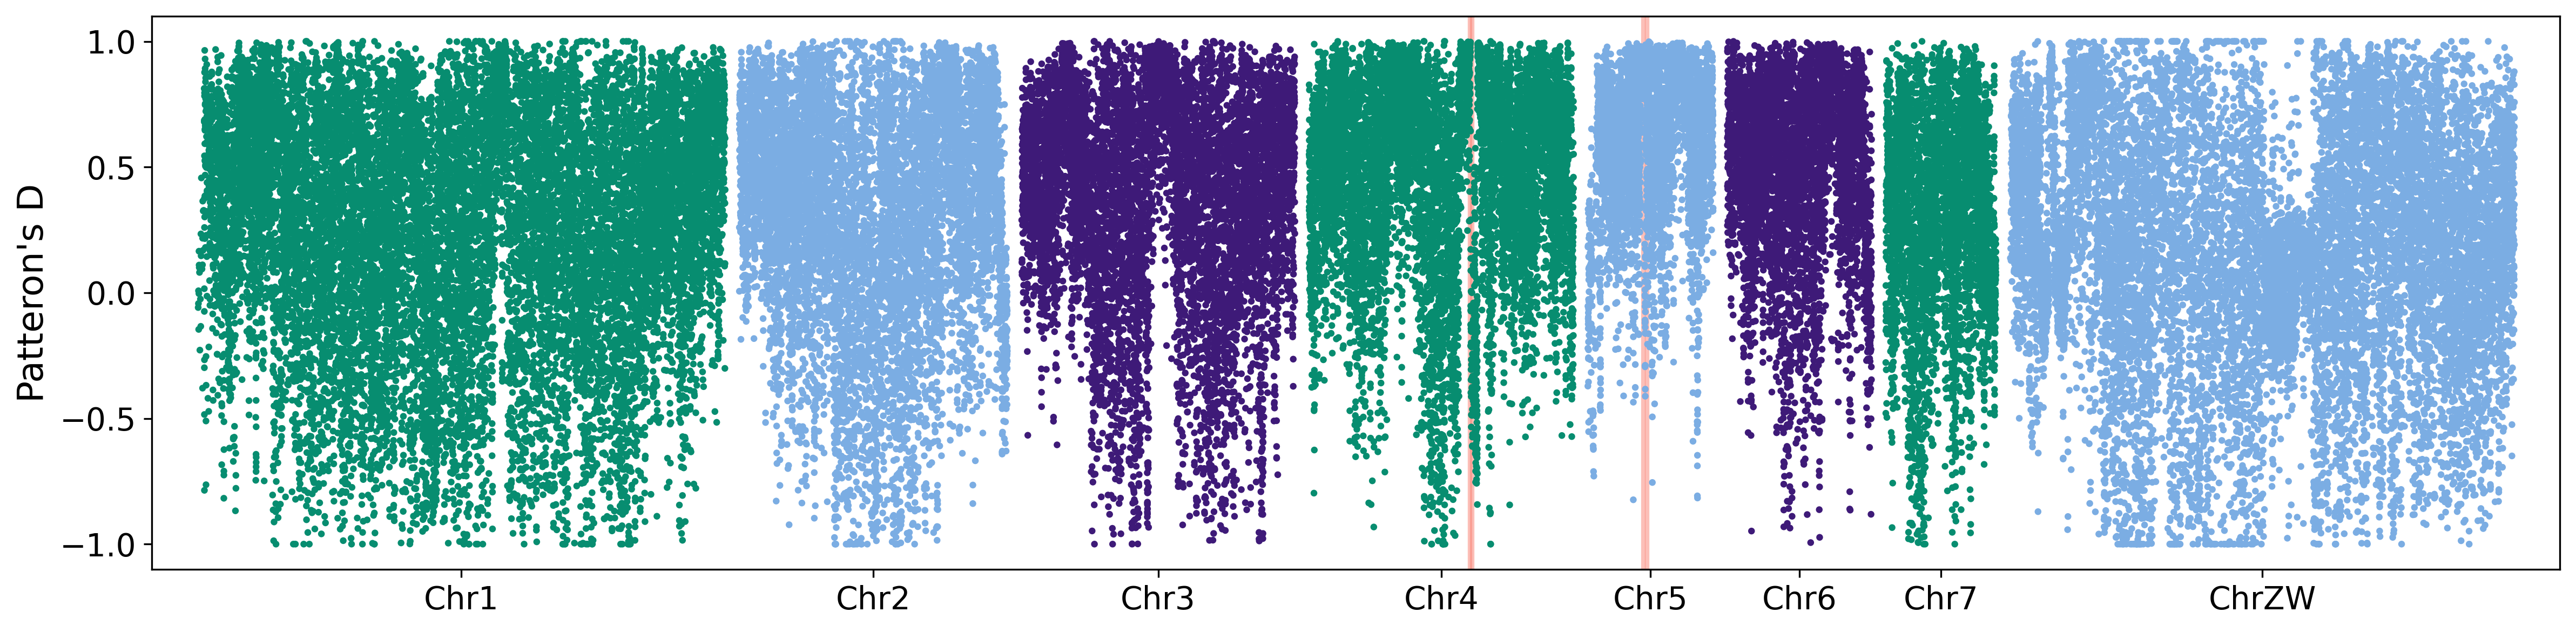

In [11]:
fig, ax = plt.subplots(figsize=(16, 4), facecolor="white", dpi=300)

x=d_df["x_pos"]
d=d_df["d"]
plt.scatter(x, d, color=d_df["color"], s=4, zorder=2)

# Set the x-axis and y-axis labels
ax.set_ylabel("Patteron's D", fontsize=16)
ax.tick_params(axis='y', labelsize=14)

ax.tick_params(axis='x', labelsize=14)
x_ticks  = list(pos_df["mid_tick"].astype(int)[0:8])
x_labels = list(pos_df["contig"].astype(str)[0:8])
ax.set_xticks(x_ticks)
ax.set_xticklabels(["Chr1", "Chr2", "Chr3", "Chr4", "Chr5", "Chr6", "Chr7", "ChrZW"])

for target in targets:
    plt.axvline(x=target, color='salmon', linestyle='-', linewidth=2, zorder=1, alpha=0.5)

plt.xlim(-8_000_000, 417_563_131)

plt.tight_layout()

plt.show()

# Save the plot as a 300 dpi PNG file
# fig.savefig('d.png', format='png', dpi=300, bbox_inches='tight')



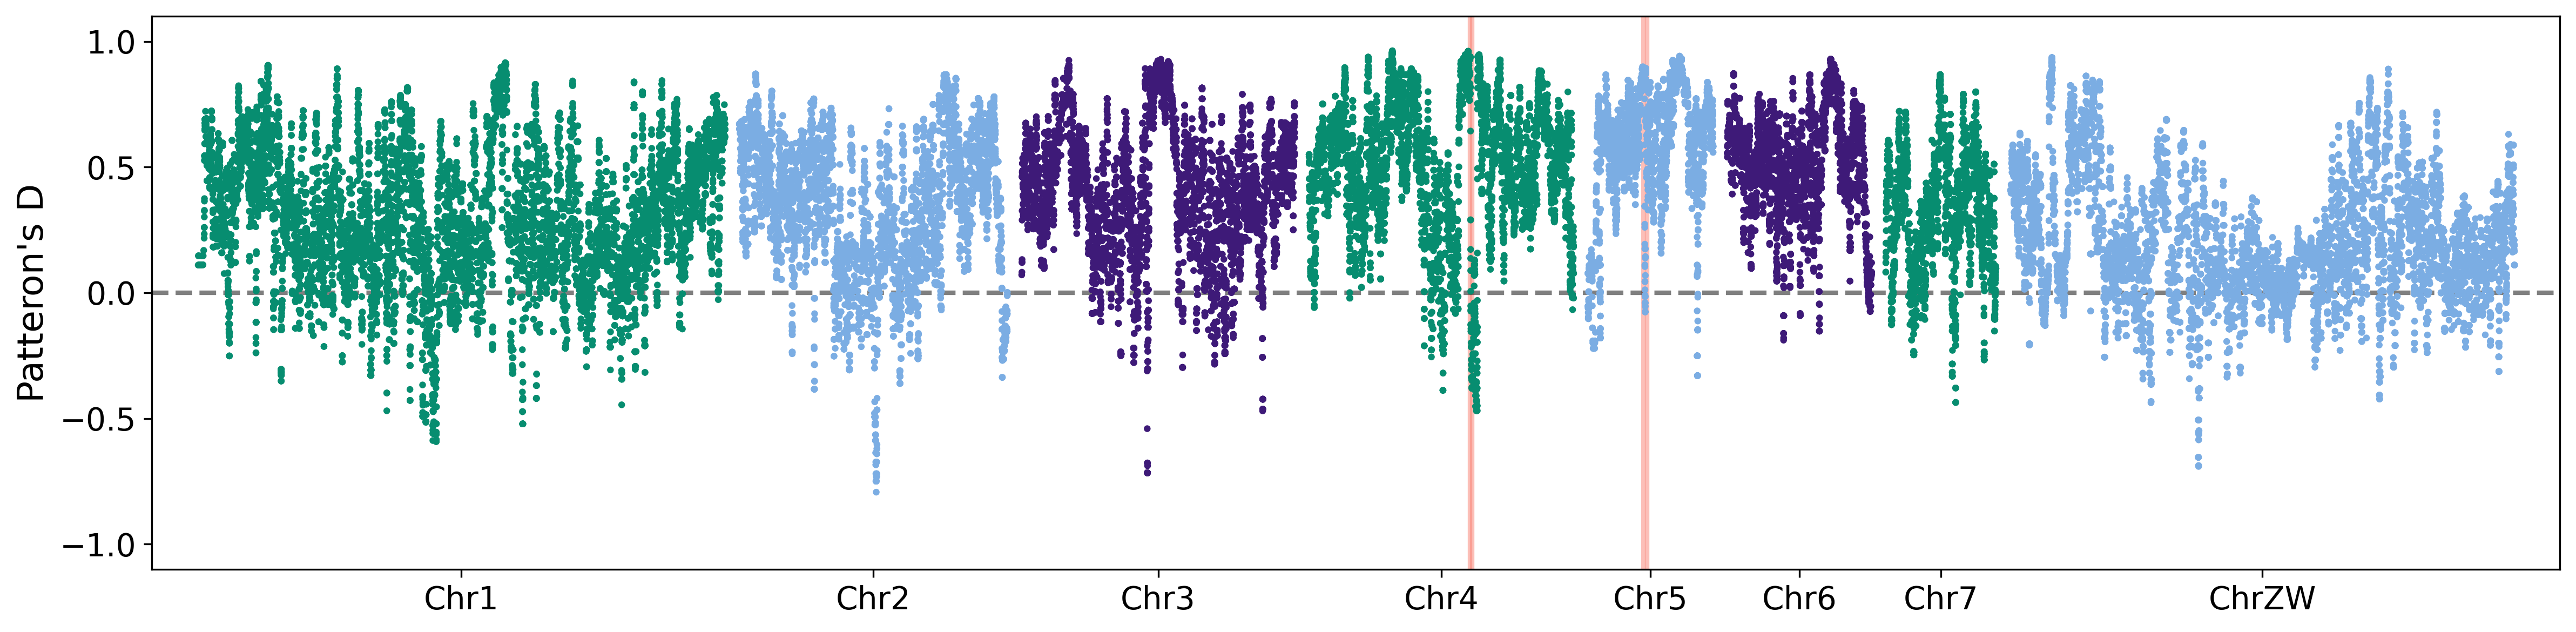

In [31]:
from scipy.ndimage import median_filter

fig, ax = plt.subplots(figsize=(16, 4), facecolor="white", dpi=300)

x=d_df["x_pos"]
k=25
d=median_filter(d_df['d'], size=k)

plt.scatter(x, d, color=d_df["color"], s=4, zorder=2)

# Set the x-axis and y-axis labels
ax.set_ylabel("Patteron's D", fontsize=16)
ax.tick_params(axis='y', labelsize=14)

ax.tick_params(axis='x', labelsize=14)
x_ticks  = list(pos_df["mid_tick"].astype(int)[0:8])
x_labels = list(pos_df["contig"].astype(str)[0:8])
ax.set_xticks(x_ticks)
ax.set_xticklabels(["Chr1", "Chr2", "Chr3", "Chr4", "Chr5", "Chr6", "Chr7", "ChrZW"])

for target in targets:
    plt.axvline(x=target, color='salmon', linestyle='-', linewidth=2, zorder=1, alpha=0.5)

plt.axhline(y=0, color='black', linestyle='--', linewidth=2, zorder=1, alpha=0.5)

plt.xlim(-8_000_000, 417_563_131)
plt.ylim(-1.1, 1.1)
plt.tight_layout()

plt.show()

# Save the plot as a 300 dpi PNG file
fig.savefig(f'd_smoothed_mf{k}.png', format='png', dpi=300, bbox_inches='tight')



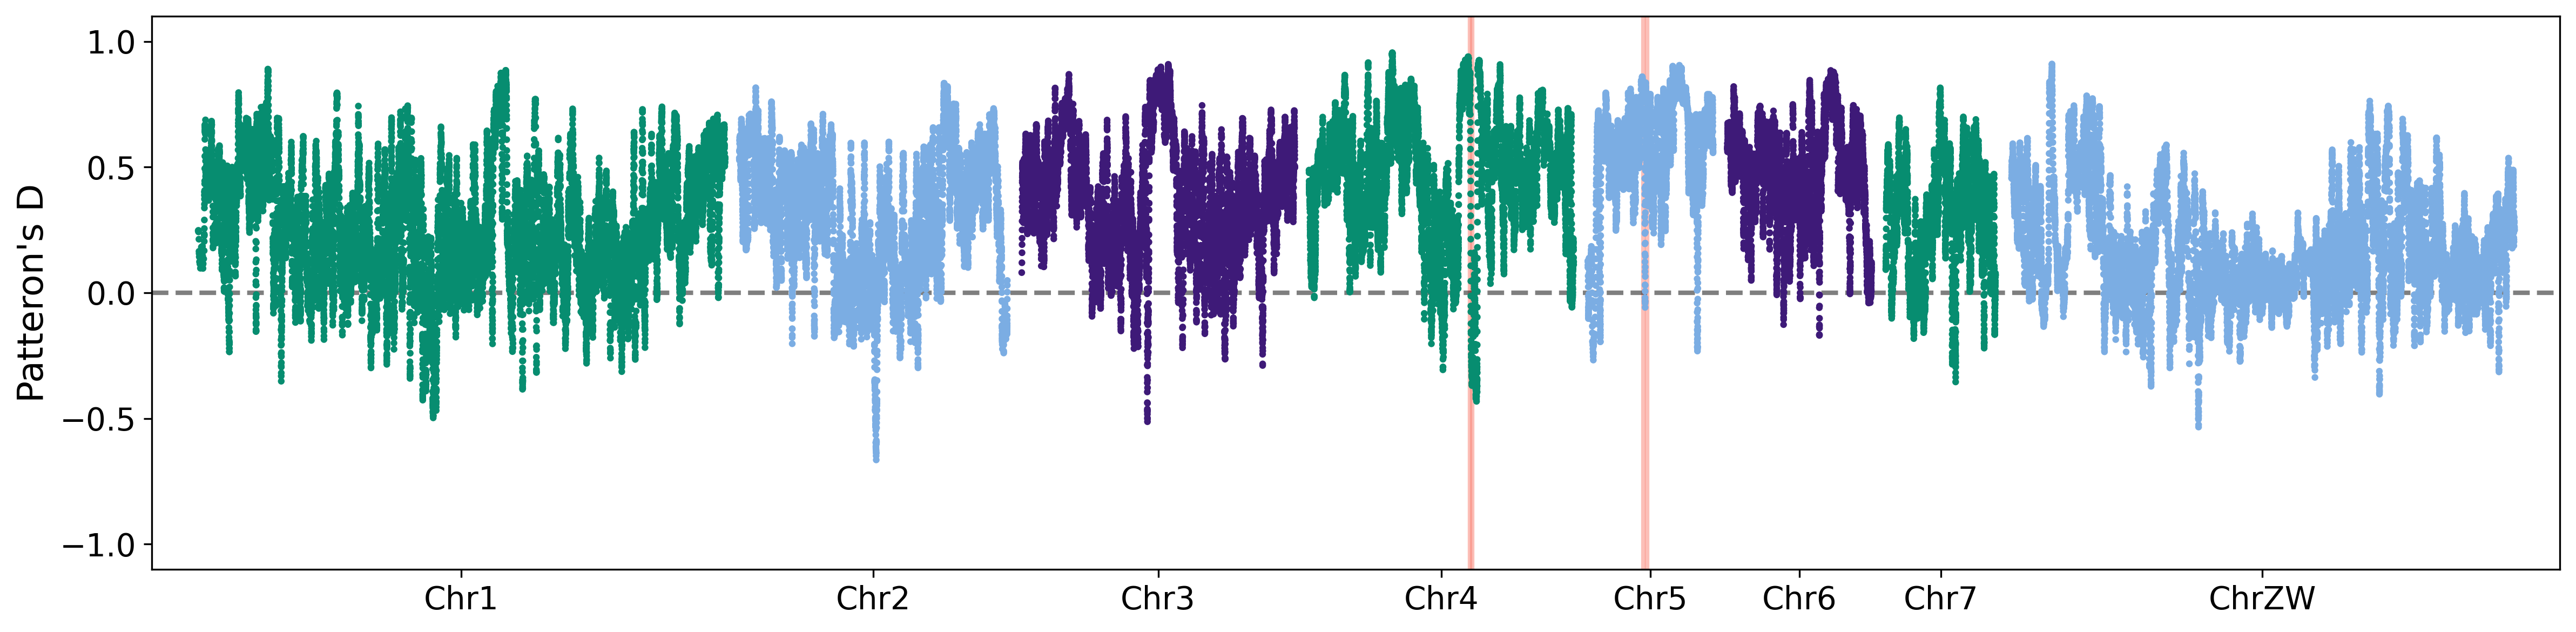

In [34]:
from scipy.ndimage import median_filter

fig, ax = plt.subplots(figsize=(16, 4), facecolor="white", dpi=300)

x=d_df["x_pos"]
k=25
d=d_df['d'].rolling(window=k, center=True).mean()

plt.scatter(x, d, color=d_df["color"], s=4, zorder=2)

# Set the x-axis and y-axis labels
ax.set_ylabel("Patteron's D", fontsize=16)
ax.tick_params(axis='y', labelsize=14)

ax.tick_params(axis='x', labelsize=14)
x_ticks  = list(pos_df["mid_tick"].astype(int)[0:8])
x_labels = list(pos_df["contig"].astype(str)[0:8])
ax.set_xticks(x_ticks)
ax.set_xticklabels(["Chr1", "Chr2", "Chr3", "Chr4", "Chr5", "Chr6", "Chr7", "ChrZW"])

for target in targets:
    plt.axvline(x=target, color='salmon', linestyle='-', linewidth=2, zorder=1, alpha=0.5)

plt.axhline(y=0, color='black', linestyle='--', linewidth=2, zorder=1, alpha=0.5)

plt.xlim(-8_000_000, 417_563_131)
plt.ylim(-1.1, 1.1)
plt.tight_layout()

plt.show()

# Save the plot as a 300 dpi PNG file
fig.savefig(f'd_smoothed_rolling{k}.png', format='png', dpi=300, bbox_inches='tight')



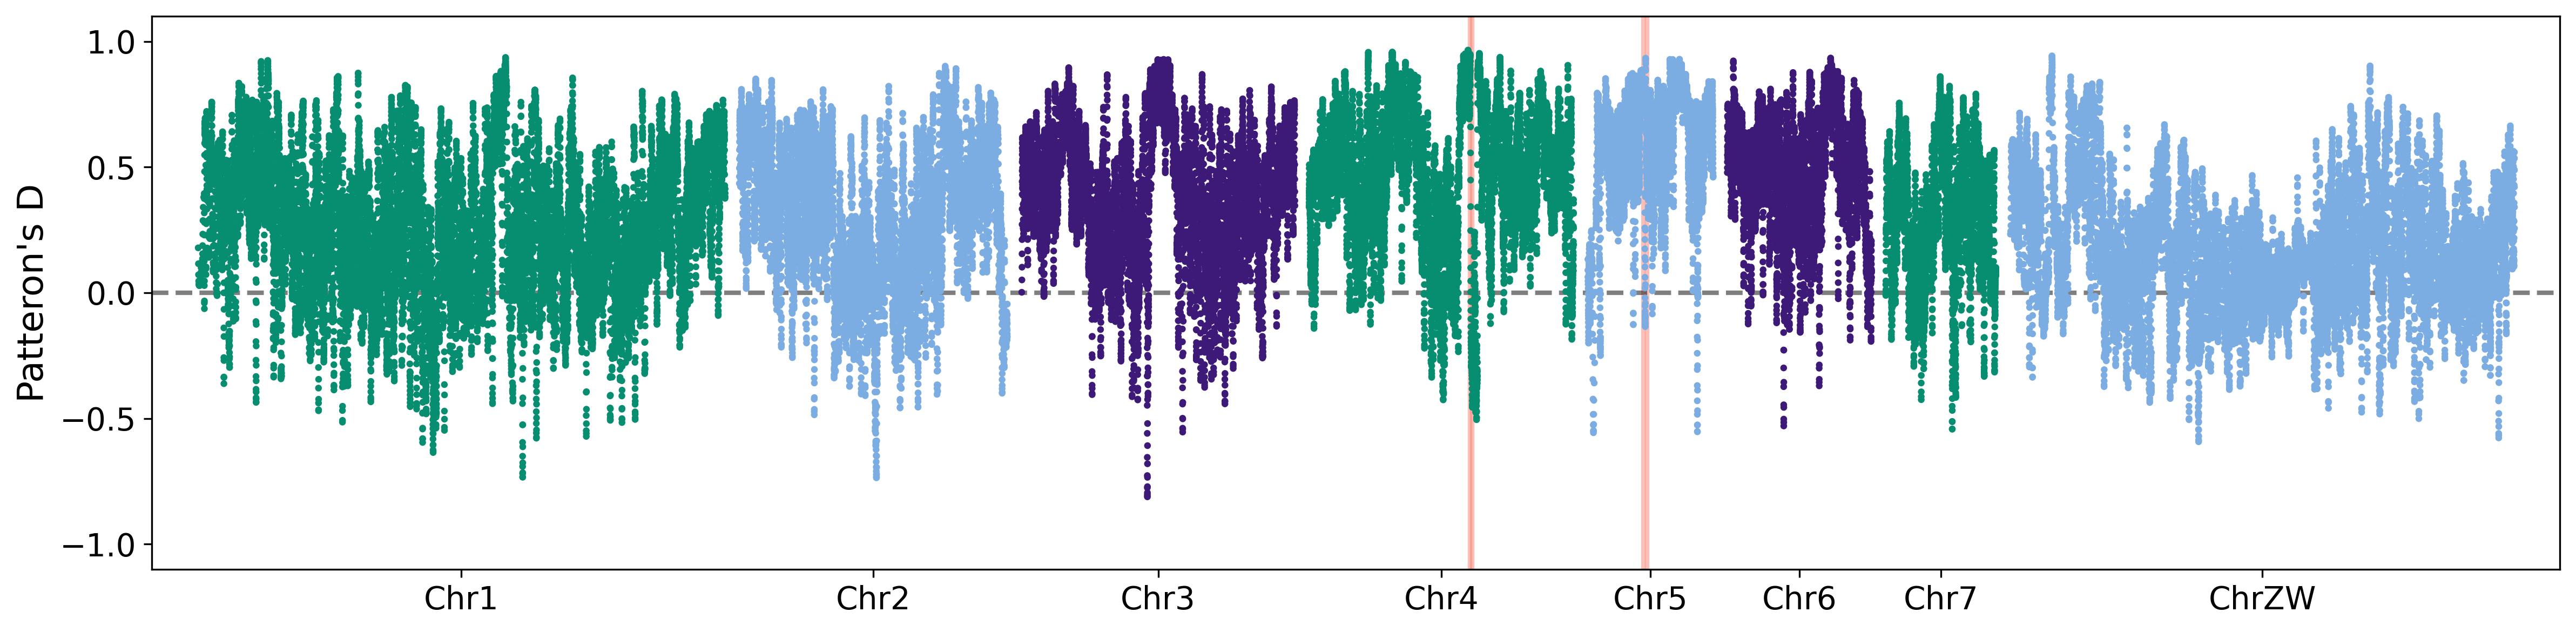

In [46]:

fig, ax = plt.subplots(figsize=(16, 4), facecolor="white", dpi=300)

x=d_df["x_pos"]
k=3
d=gaussian_filter1d(d_df['d'], sigma=k)

plt.scatter(x, d, color=d_df["color"], s=4, zorder=2)

# Set the x-axis and y-axis labels
ax.set_ylabel("Patteron's D", fontsize=16)
ax.tick_params(axis='y', labelsize=14)

ax.tick_params(axis='x', labelsize=14)
x_ticks  = list(pos_df["mid_tick"].astype(int)[0:8])
x_labels = list(pos_df["contig"].astype(str)[0:8])
ax.set_xticks(x_ticks)
ax.set_xticklabels(["Chr1", "Chr2", "Chr3", "Chr4", "Chr5", "Chr6", "Chr7", "ChrZW"])

for target in targets:
    plt.axvline(x=target, color='salmon', linestyle='-', linewidth=2, zorder=1, alpha=0.5)

plt.axhline(y=0, color='black', linestyle='--', linewidth=2, zorder=1, alpha=0.5)

plt.xlim(-8_000_000, 417_563_131)
plt.ylim(-1.1, 1.1)
plt.tight_layout()

plt.show()

# Save the plot as a 300 dpi PNG file
fig.savefig(f'd_smoothed_gaus{k}.png', format='png', dpi=300, bbox_inches='tight')



# FST

In [8]:
f_df.head()

chr  start   stop  counts     nw_se     nw_sb     se_sb     sh_sb
0  NC_067195.1      1  10000       0       NaN       NaN       NaN       NaN
1  NC_067195.1  10001  20000     145  0.108801  0.401244  0.456864  0.404991
2  NC_067195.1  20001  30000      77  0.077458  0.073799  0.296456  0.123940
3  NC_067195.1  30001  40000     172  0.044535  0.441660  0.446748  0.470867
4  NC_067195.1  40001  50000      10  0.015244  0.115416  0.240411  0.191498

In [9]:
# Map offsets and colors to x_df
f_df["offset"] = f_df["chr"].map(offsets)
f_df["color"]  = f_df["chr"].map(colors)

# Calculate x_pos using vectorized operations
f_df["x_pos"] = (f_df["start"] + f_df["stop"])/2 + f_df["offset"]

# Drop the temporary 'offset' column if not needed
f_df = f_df.drop(columns=["offset"])

f_df.to_csv(f"fst_to_plot.csv", header=True, sep=",", index=False)
f_df.head()

chr  start   stop  counts     nw_se     nw_sb     se_sb     sh_sb  \
0  NC_067195.1      1  10000       0       NaN       NaN       NaN       NaN   
1  NC_067195.1  10001  20000     145  0.108801  0.401244  0.456864  0.404991   
2  NC_067195.1  20001  30000      77  0.077458  0.073799  0.296456  0.123940   
3  NC_067195.1  30001  40000     172  0.044535  0.441660  0.446748  0.470867   
4  NC_067195.1  40001  50000      10  0.015244  0.115416  0.240411  0.191498   

     color        x_pos  
0  #7bade3  320418657.5  
1  #7bade3  320428657.5  
2  #7bade3  320438657.5  
3  #7bade3  320448657.5  
4  #7bade3  320458657.5

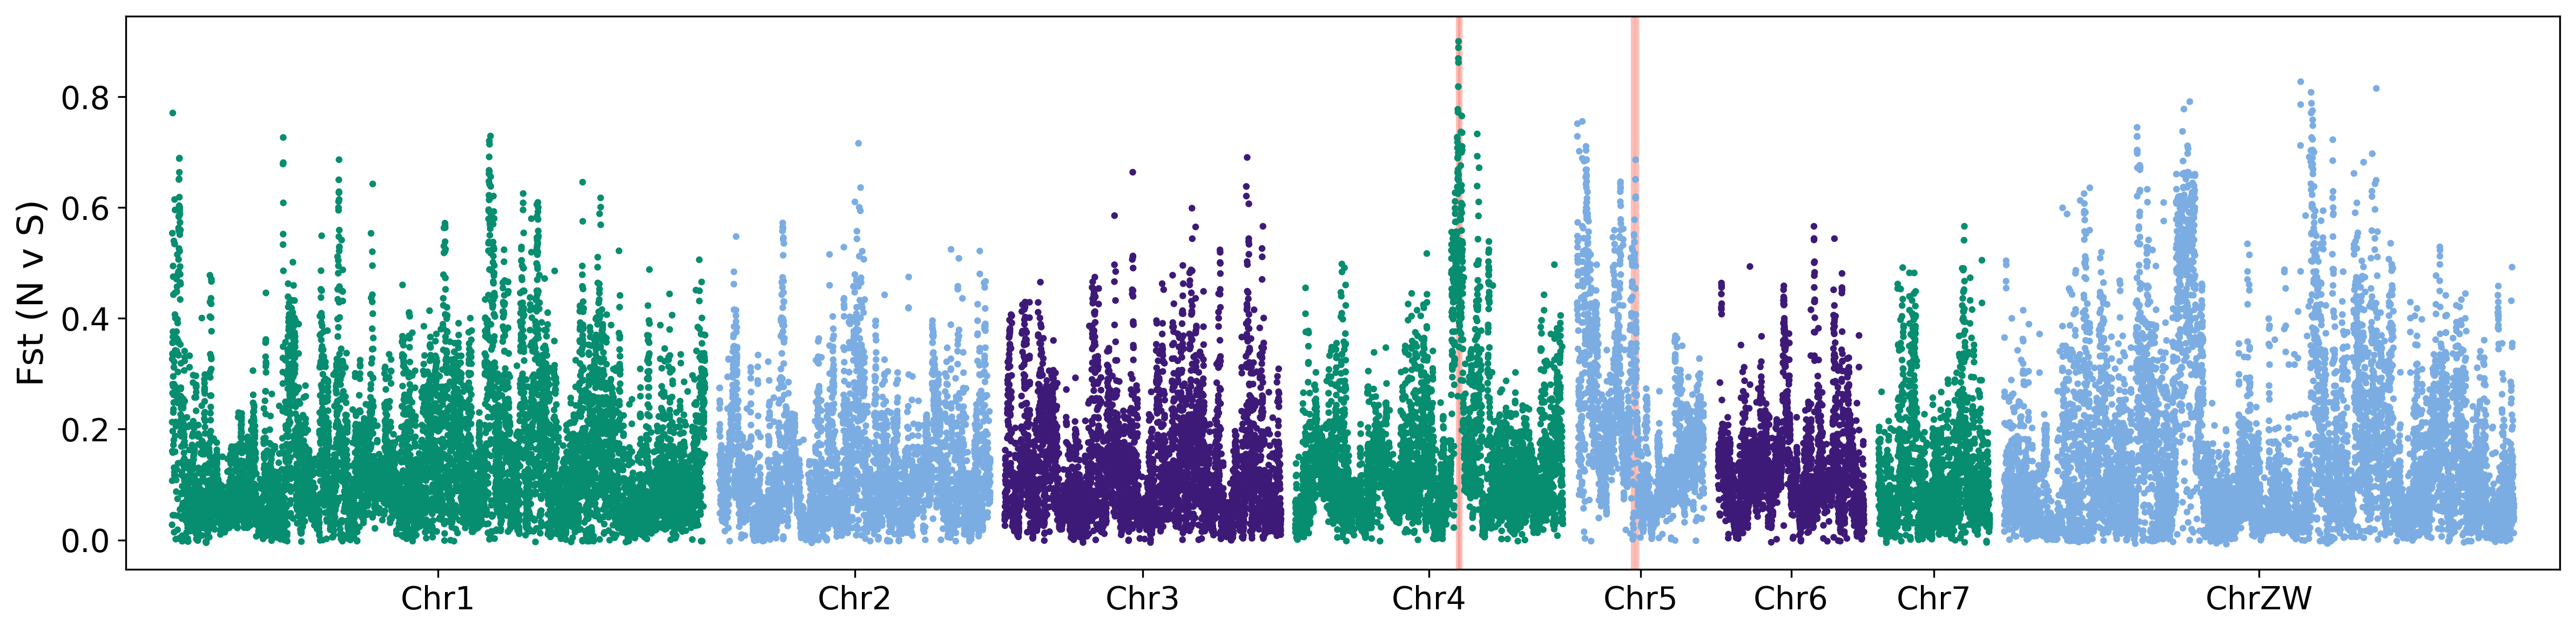

In [12]:
fig, ax = plt.subplots(figsize=(16, 4), facecolor="white", dpi=300)

plt.scatter(f_df["x_pos"], f_df["nw_se"], color=f_df["color"], s=4, zorder=2)

# Set the x-axis and y-axis labels
ax.set_ylabel("Fst (N v S)", fontsize=16)
ax.tick_params(axis='y', labelsize=14)

ax.tick_params(axis='x', labelsize=14)
x_ticks  = list(pos_df["mid_tick"].astype(int)[0:8])
x_labels = list(pos_df["contig"].astype(str)[0:8])
ax.set_xticks(x_ticks)
ax.set_xticklabels(["Chr1", "Chr2", "Chr3", "Chr4", "Chr5", "Chr6", "Chr7", "ChrZW"])

for target in targets:
    plt.axvline(x=target, color='salmon', linestyle='-', linewidth=2, zorder=1, alpha=0.5)

plt.xlim(-8_000_000, 417_563_131)

plt.tight_layout()

plt.show()

# Save the plot as a 300 dpi PNG file
fig.savefig('fst.png', format='png', dpi=300, bbox_inches='tight')

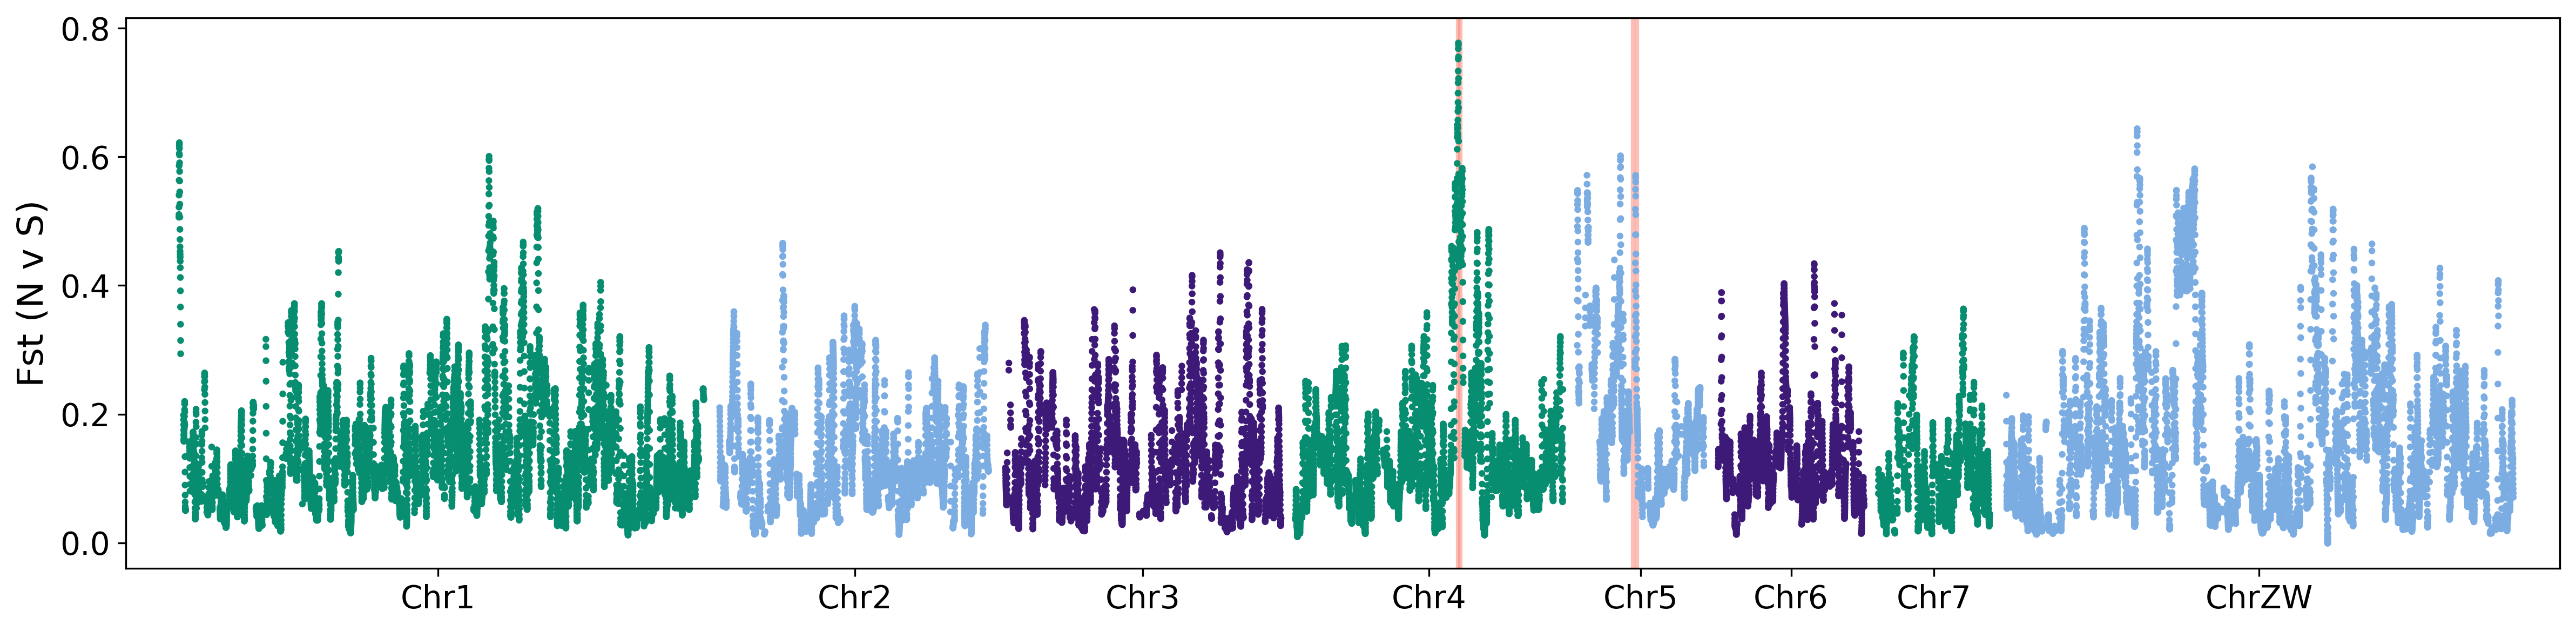

In [13]:
fig, ax = plt.subplots(figsize=(16, 4), facecolor="white", dpi=300)

x=f_df["x_pos"]
y=gaussian_filter1d(f_df["nw_se"], sigma=3)

plt.scatter(x, y, color=f_df["color"], s=4, zorder=2)

# Set the x-axis and y-axis labels
ax.set_ylabel("Fst (N v S)", fontsize=16)
ax.tick_params(axis='y', labelsize=14)

ax.tick_params(axis='x', labelsize=14)
x_ticks  = list(pos_df["mid_tick"].astype(int)[0:8])
x_labels = list(pos_df["contig"].astype(str)[0:8])
ax.set_xticks(x_ticks)
ax.set_xticklabels(["Chr1", "Chr2", "Chr3", "Chr4", "Chr5", "Chr6", "Chr7", "ChrZW"])

for target in targets:
    plt.axvline(x=target, color='salmon', linestyle='-', linewidth=2, zorder=1, alpha=0.5)

plt.xlim(-8_000_000, 417_563_131)

plt.tight_layout()

plt.show()

# Save the plot as a 300 dpi PNG file
fig.savefig('fst_guass3.png', format='png', dpi=300, bbox_inches='tight')


In [14]:
pwd

'/master/nplatt/sch_hae_scan/results/ancestry_twisst_fig'